In [ ]:
import pandas as pd
from GEOparse import get_GEO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gse = get_GEO("GSE62945", destdir=".")
samples = gse.gsms
# 1. Get expression data
expr_df = pd.DataFrame({gsm_name: gsm.table.set_index("ID_REF")["VALUE"]
                        for gsm_name, gsm in samples.items()})
expr_df = expr_df.T
expr_df.index.name = "sample_id"
expr_df.reset_index(inplace=True)

# 2. Get sample labels
sample_info = []
for gsm_name, gsm in samples.items():
    label = gsm.metadata.get("characteristics_ch1", ["unknown"])[0]
    sample_info.append((gsm_name, label))
sample_df = pd.DataFrame(sample_info, columns=["sample_id", "label"])
sample_df['label'] = sample_df['label'].str.replace(".*: ", "", regex=True)

# 3. Merge both
df = pd.merge(sample_df, expr_df, on="sample_id")
df.head()

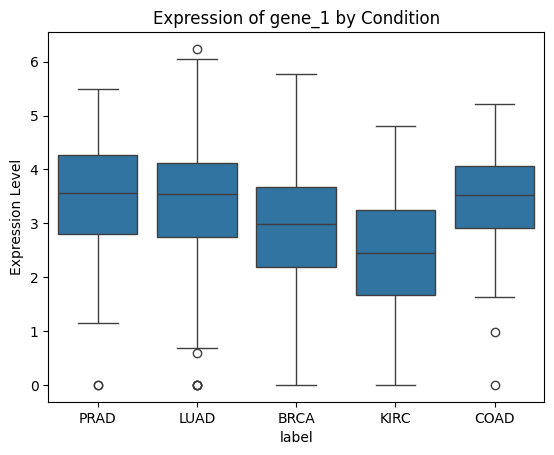

In [ ]:
gene = 'gene_1'

sns.boxplot(x='label', y=gene, data=df)
plt.title(f'Expression of {gene} by Condition')
plt.ylabel("Expression Level")
plt.show()

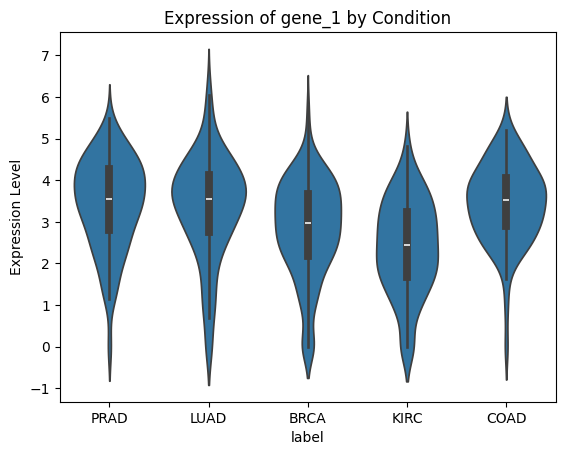

In [36]:
sns.violinplot(x='label', y=gene, data=df)
plt.title(f'Expression of {gene} by Condition')
plt.ylabel("Expression Level")
plt.show()

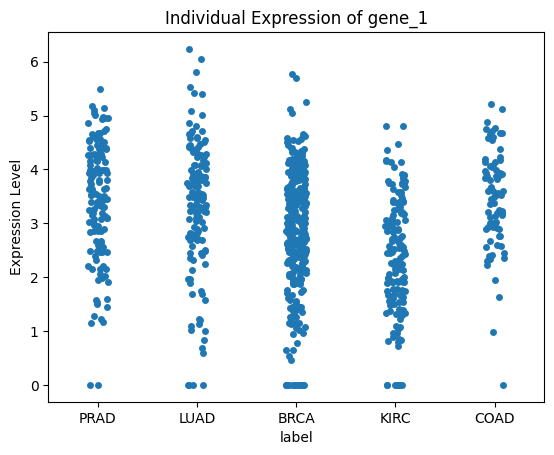

In [37]:
sns.stripplot(x='label', y=gene, data=df, jitter=True)
plt.title(f'Individual Expression of {gene}')
plt.ylabel("Expression Level")
plt.show()

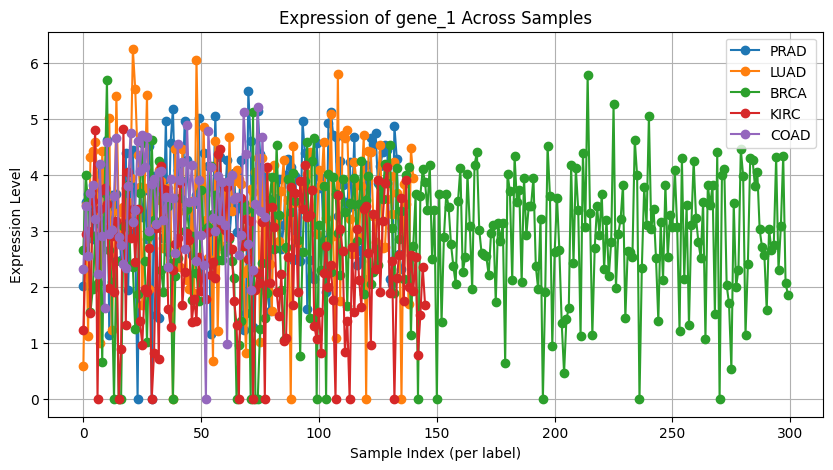

In [38]:
# Unique labels (e.g., Tumor, Normal, etc.)
labels = df['label'].unique()

# Plot expression values for each label
plt.figure(figsize=(10, 5))
for label in labels:
    values = df[df['label'] == label][gene].values
    plt.plot(np.arange(len(values)), values, label=label, marker='o')

plt.title(f"Expression of {gene} Across Samples")
plt.xlabel("Sample Index (per label)")
plt.ylabel("Expression Level")
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='gene_1', ylabel='Density'>

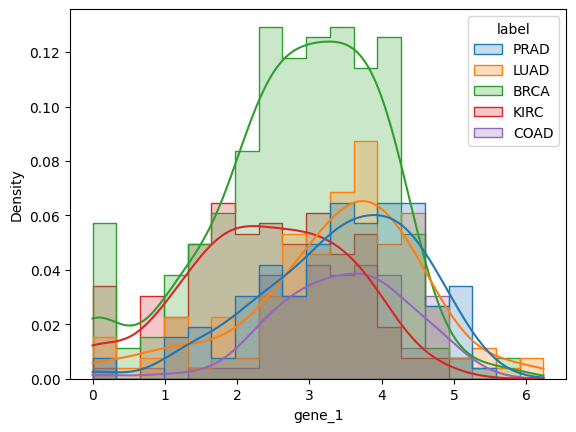

In [39]:
sns.histplot(data=df, x=gene, hue='label', kde=True, element="step", stat="density")


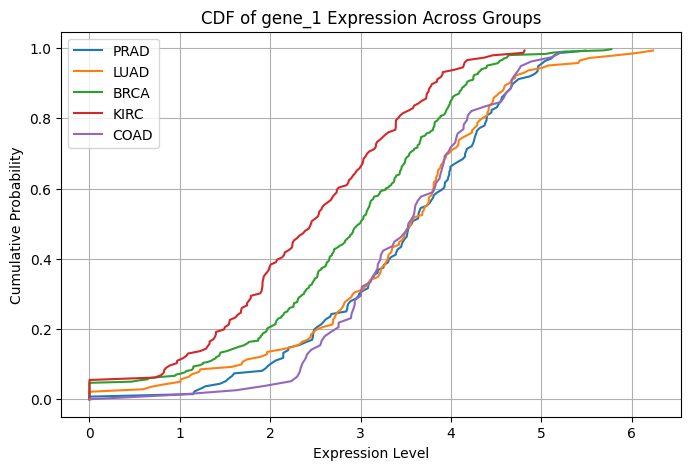

In [45]:
def plot_cdf(values, label):
    sorted_vals = np.sort(values)
    y = np.arange(len(sorted_vals)) / float(len(sorted_vals))
    plt.plot(sorted_vals, y, label=label)
# Plot for each label
plt.figure(figsize=(8, 5))
for label in df['label'].unique():
    values = df[df['label'] == label][gene].values
    plot_cdf(values, label)

plt.title(f"CDF of {gene} Expression Across Groups")
plt.xlabel("Expression Level")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


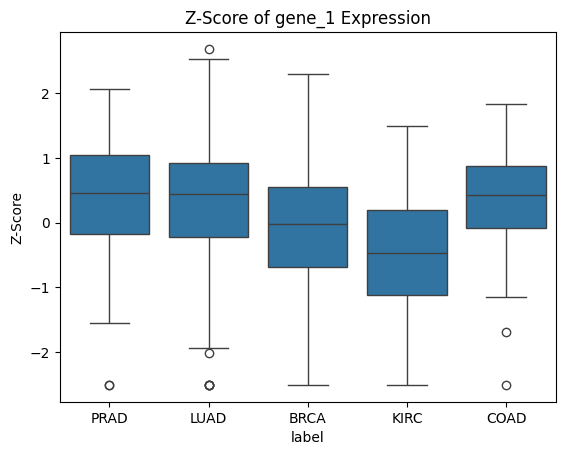

In [47]:
from scipy.stats import zscore

df['z_score'] = zscore(df[gene])

sns.boxplot(x='label', y='z_score', data=df)
plt.title(f"Z-Score of {gene} Expression")
plt.ylabel("Z-Score")
plt.show()